### Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.

In [1]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [3]:
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))
    
    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [10]:
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [11]:
iris = datasets.load_iris()

iris_data = iris.data
iris_target = iris.target

x = normalize(iris_data)

y = to_one_hot(iris_target)

train_index, test_index = train_test_split(pd.DataFrame(x).index, test_size=0.33, shuffle=True, random_state=5)

X_train = x[train_index]
y_train = y[train_index]
X_test = x[test_index]
y_test = y[test_index]

In [12]:
np.random.RandomState(5)
w0 = 2*np.random.random((4, 6)) - 1
w1 = 2*np.random.random((6, 3)) - 1

n = 0.005
iterations = 10000000

errors = []

for i in range(iterations):

    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

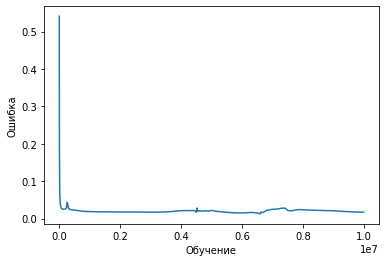

Точность нейронной сети 98.29%


In [13]:
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

#### Увеличено количество нейронов в скрытом слое.

#### Уменьшена скорость обучения и увеличено количество итераций.